In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZZGate
import numpy as np
import logging

In [4]:

# Configure logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

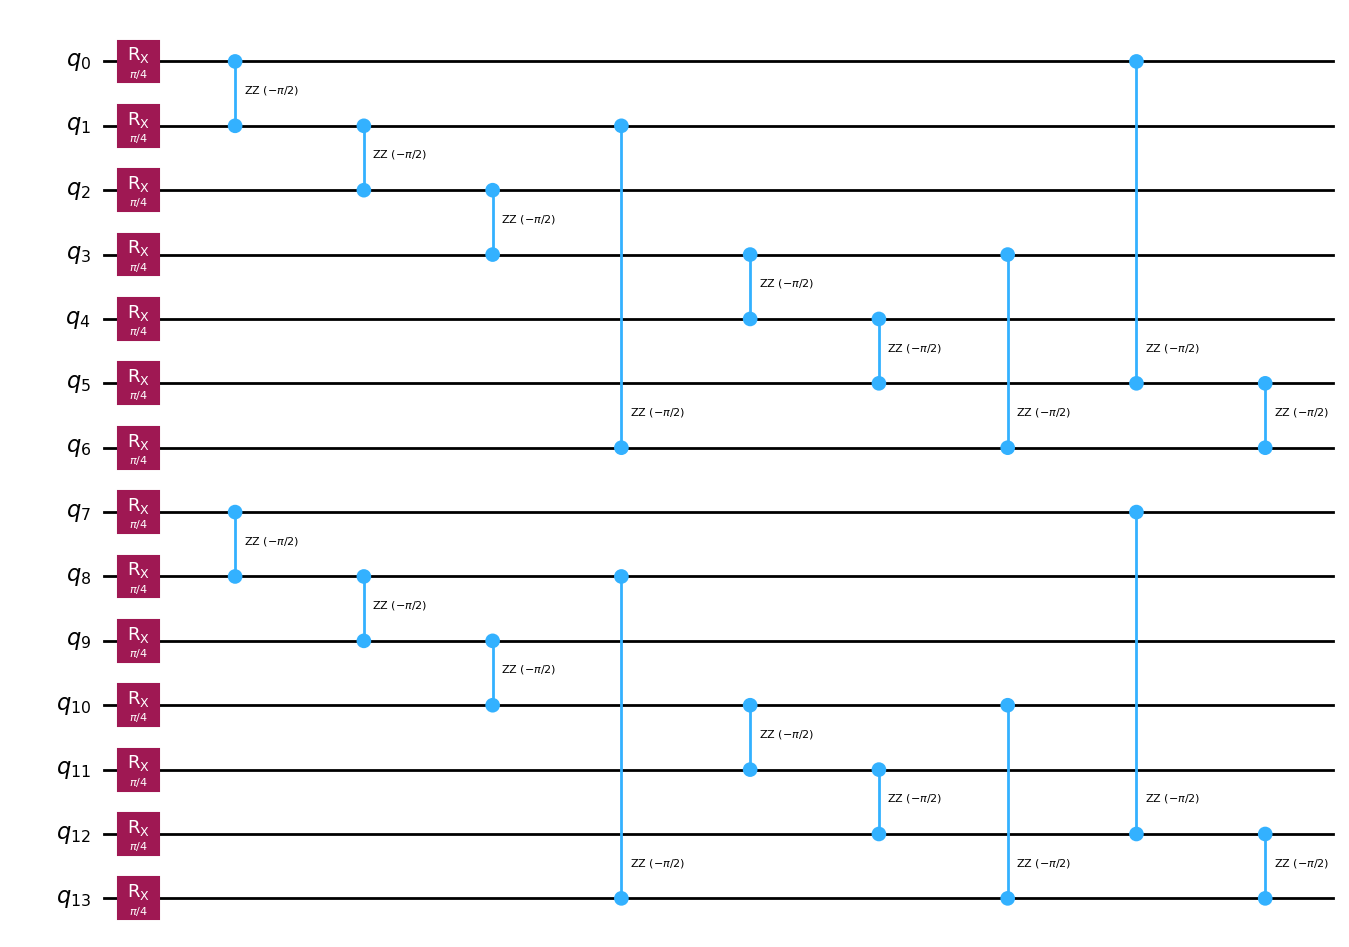

: 

In [6]:
# 参数
theta_h = np.pi/4
n_qubits = 14

# heavy-hex 拓扑的示例邻接（请根据具体布局修改）
edges = [
    (0,1),(1,2),(2,3),(3,4),(4,5),(5,0),(1,6),(3,6),(5,6),
    (7,8),(8,9),(9,10),(10,11),(11,12),(12,7),(8,13),(10,13),(12,13)
]

# 构造电路
qc = QuantumCircuit(n_qubits)
# 1) 所有 qubit 上做 RX(θ_h)
for q in range(n_qubits):
    qc.rx(theta_h, q)

# 2) 对每条重边施加 RZZ(-π/2) 门，实现 e^{i π/4 Z⊗Z}
for (i, j) in edges:
    qc.append(RZZGate(-np.pi/2), [i, j])

# 画图
qc.draw('mpl',fold = -1);